In [68]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import house_sales_data as hsd
from sklearn.model_selection import train_test_split

In [69]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data['price']
area = data['area']
beds = data['beds']

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [70]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    for t in range(max_iteration):
        gradient = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            costs[t] = costs[t] + (1/m * (yhat - y[i])**2)
            for j in range(n):
                gradient[j] = gradient [j] + (1/m * 2 * (yhat - y[i])*X[i,j])
        theta = theta - (learning_rate * gradient)
    return theta, costs

In [71]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return X, y, min_X, max_X, min_y, max_y

In [72]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    mse=sum((y-y_hat)**2)
    return mse

In [73]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# call gradient descent and fine-tune your learning rate
theta, costs = gradient_descent(X_train, y_train, 501, 0.01)

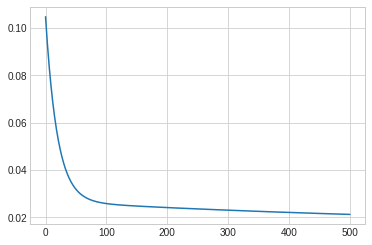

In [75]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
plt.plot(range(len(costs)),costs)

In [76]:
# print evaluation metric for test set while
y_pred = X_test@theta
print('Evaluation Metric : ' , evaluation_metric(y_test,y_pred))
 
# changing max_iteration from 500 to 2000
eval_mat=[]
for iters in list(range(500 , 2001 , 100)):
    theta , error = gradient_descent(X_train, y_train, iters, 0.1)
    y_hat = X_test@theta
    eval_mat.append(evaluation_metric(y_test,y_hat))
print("The values of evaluation metric : ", eval_mat)
print("The best value of evaluation metric we get : ", eval_mat[-1])

Evaluation Metric :  2.9173848817649115
The values of evaluation metric :  [2.1496909180963875, 2.1084649644828963, 2.076177103517404, 2.0509750143156413, 2.031312279984596, 2.015937673167331, 2.0038686012673805, 1.9943471211379844, 1.9867937590432079, 1.9807669134426926, 1.9759299663644492, 1.972025705950086, 1.968856848669283, 1.9662713632194175, 1.9641514657484767, 1.9624053800274261]
The best value of evaluation metric we get :  1.9624053800274261


In [77]:
best_value=eval_mat[-1]
y_pred = X_test@model.coef_
sk_value = evaluation_metric(y_test,y_pred)
print('Best Evaluated Value ' ,best_value)
print('sk-learn value ',sk_value)

Best Evaluated Value  1.9624053800274261
sk-learn value  3.0872320784172915


In [78]:
# compare your solution with scikit-learn library
#from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [79]:
# Create linear regression object
model= LinearRegression()

In [80]:
# Train the model using the training sets
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X,y,min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

model.fit(X_train,y_train)

LinearRegression()

In [81]:
# Predict on test set and print evaluation metric
pred_data=model.predict(X_test)
pred_data
# How much does it differ by from your (GD) solution

array([0.29777764, 0.19146489, 0.29315861, 0.33165052, 0.12701844,
       0.19571909, 0.50262969, 0.22475299, 0.31346944, 0.26588434,
       0.18736085, 0.57851374, 0.20363743, 0.38275488, 0.45270018,
       0.49141204, 0.14806419, 0.19579416, 0.22482806, 0.16976454,
       0.70748173, 0.17196408, 0.12731346, 0.29051917, 0.59567013,
       0.34814706, 0.15891173, 0.11822028, 0.20363743, 0.19549914,
       0.19652383, 0.15766709, 0.39419247, 0.34470287, 0.24234929,
       0.1499687 , 0.15077344, 0.28568018, 0.15194829, 0.55512356,
       0.23875495, 0.30863045, 0.08222294, 0.15077344, 0.13009779,
       0.26009574, 0.28553531, 0.22629266, 0.14073064, 0.1538528 ,
       0.21881424, 0.32754648, 0.19843361, 0.3145692 , 0.1091271 ,
       0.17342868, 0.14285511, 0.22673257, 0.38341474, 0.1732838 ,
       0.35855996, 0.25862587, 0.17174413, 0.44250723, 0.18787583,
       0.24938781, 0.25936081, 0.1366964 , 0.21251065, 0.08896643,
       0.49654605, 0.23120672, 0.24498874, 0.18948531, 0.36068